# Playground TAE

https://github.com/SubramaniKrishna/VaPar-Synth



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as pyp
import IPython.display as ipd
import matplotlib.pyplot as plt

from env import *
from data.transform import envelope as fe
from visualization import plot_spec
from data.transform import db_to_amp, log_stft
from data.metadata import vcc
from data import AudioData, read_audio


plt.style.use({'figure.facecolor':'white'})


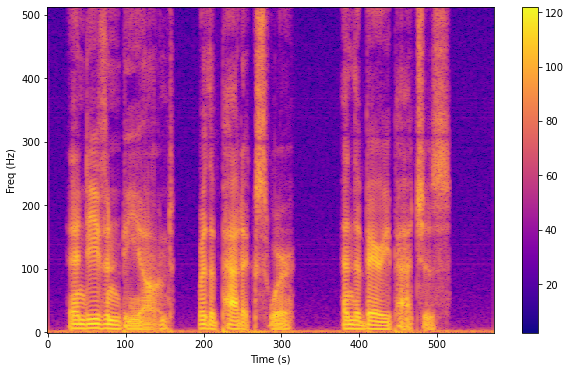

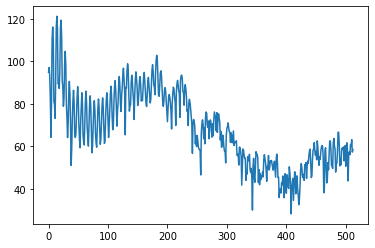

In [3]:
fs = sr
filename = vcc.train_2016_appended(3, 0)
audio = read_audio(filename)
dat = AudioData(filename)
log_amp = log_stft(dat.amp)
plot_spec(log_amp)
ipd.Audio(audio, rate=fs)
plt.figure(
)
frame = log_amp[:, 55]
plt.plot(frame)

In [4]:
# fft_size = n_fft
# window = 'hann'
# fs = sr
# f0 = 440
# num_coeff = 20
# choice = 2
# choice_inp = 0
# inp = audio[1000:1000 + fft_size]
# ceps_env = fe.ceps_envelope(inp,fft_size,window,fs,f0,num_coeff,choice,choice_inp)

# # LPC Envelope
# M = 10
# freq_size = 1024
# lpc_env = fe.lpc_envelope(inp,M,fs,freq_size)

# True Envelope
fft_size = 1024
thresh = 0.1
# The number of coefficients is chosen according to the formula (fs/2*f0), similar to the number of coefficients chose in the cepstrum
num_coeff = 20
stopping_iters = 10
# tae_env = fe.calc_true_envelope(inp,fft_size,thresh,num_coeff,stopping_iters)
tae_env = fe.calc_tae(frame,thresh,10)


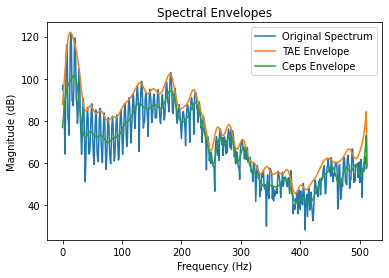

In [5]:
# %matplotlib notebook
# Comparison of the spectra
pyp=plt
pyp.figure()
pyp.title('Spectral Envelopes')
pyp.xlabel('Frequency (Hz)')
pyp.ylabel('Magnitude (dB)')
# f_Hz = np.arange(fft_size)*(fs/fft_size)
pyp.plot(frame,label = 'Original Spectrum')
# pyp.plot(20*ceps_env[0][:fft_size//2 + 1],label = 'Cepstral Envelope')
# pyp.plot(f_Hz[:fft_size//2 + 1],20*lpc_env[:fft_size//2 + 1]/20,label = 'LPC Envelope')
# pyp.twinx()
pyp.plot(tae_env[0],label = 'TAE Envelope')
pyp.plot(tae_env[1],label = 'Ceps Envelope')

# pyp.plot(20*tae_env[0][:fft_size//2 + 1],label = 'TAE Envelope')
pyp.legend()
pyp.show()